#### The roadmap of my analysis

# 1. EXPLORATORY DATA ANALYSIS

## FORM ANALYSIS

- importing datas value
- Shape of data : **(11914, 16)**
- determine the number and types of data
     - qualitatives = 8
     - quantitatives = 8

- Target of data = **MSRP**
- **information sur le target :**
     - **PRICE---------- DESCRIPTION**
          - mean   --  40594.74
          - min    --  2000
          - max    --  2.065902e+06
            
- Analysis of NAN values :
    - il n'y a pas presque pas de valeurs manquantes seule quatre features ont des valeurs manquantes
    - la plupart des valuers manquantes sont de la variables Category qui comporte en elle même plusieurs sous-category donc on peut penser a deja la supprimer du dataset au niveau du prepocessing
    
    
 ## INNER ANALYSIS
 - vu le nombre de colonnes nous n'avons pas besion de supprimer de colonnes
 
 - Il y'a beaucoup de category (71) de voitures pour les marques de voitures et la plupart sont seulement des chevrolets
 - 915 models de voitures sont vendu , ce qui fait que la variable models ne joue pas trop sur le prix , puisqu'il y'a plusieurs de voitures surement en fonction du model : VARIABLE A SURVIELLER DE PRES LORS DE LA MODELISATION
 
 - On peut noter qu'il y a plusieurs types de fuel utilisé et que la majeur partie est sans plomb , donc au cas ou y a valeur manquante on sait deja quel est la category qui sera use
 - on peut constater que features cooreles sont les puissances et les nombre de cylindres avec plus de 0.6 de correlation
 
 ### MORE ANALYSIS
-  On peut en plus des analyses precedantes ajouter que :
     - l'odomètre que nous avons avions considéré comme critère de prix ne l'est pas vu qu'il son taux de correlation est très faible et inferieur a **0**
     - En plus de cela , l'année de la voiture de la voiture ne joue pas un rôle essentiel dans le prix basé aussi sur les tests de corelation
     

In [1]:
import pandas as pd
donne = pd.read_csv('pratices/data_cars.csv')

data = donne.copy()

data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [21]:
data.rename(columns={
    'Engine Fuel Type': 'Fuel',
    'Engine HP' : 'Engine',
    'Engine Cylinders' : 'Cylinders',
    'Transmission Type' : 'Transmission',
    'Number of Doors' : 'Doors',
    'Market Category' : 'Category',
    'Vehicle Size' : 'Size',
    'Vehicle Style' : 'Style',
    'highway MPG' : 'MPG',
    'city mpg' : 'City'
}, inplace=True)

<AxesSubplot:>

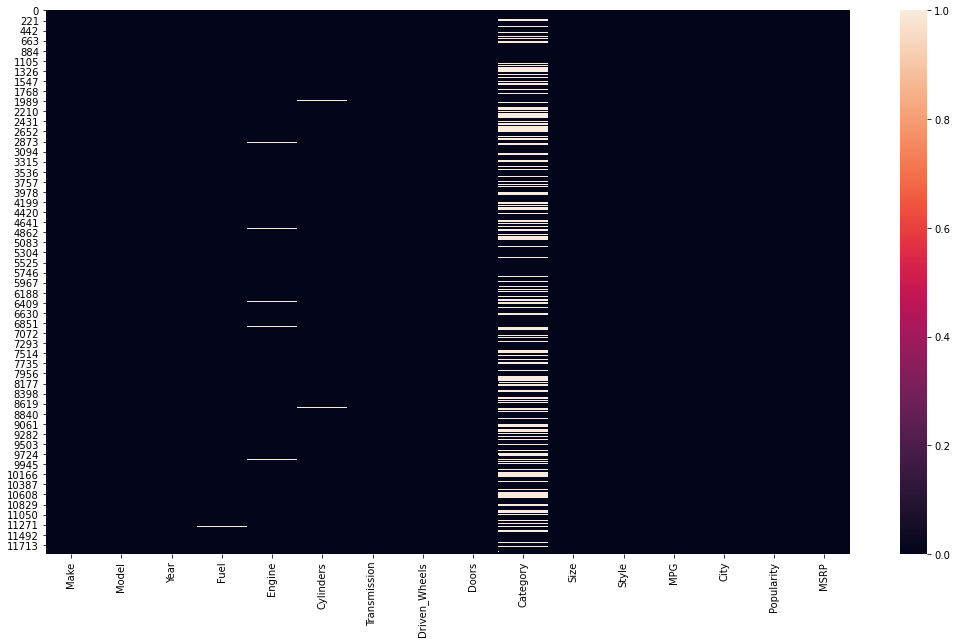

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

plt.figure(figsize=(18,10))
sb.heatmap(data.isna())


<AxesSubplot:>

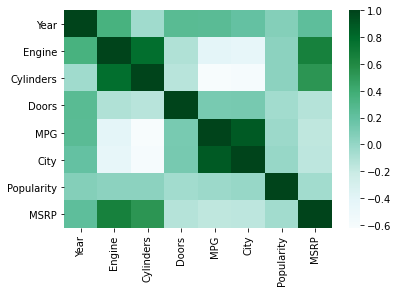

In [23]:
sb.heatmap(data.corr(), cmap='BuGn')

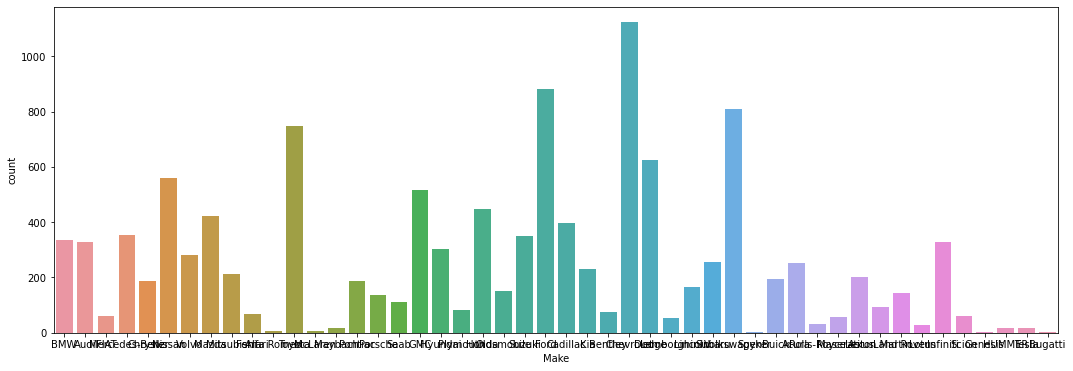

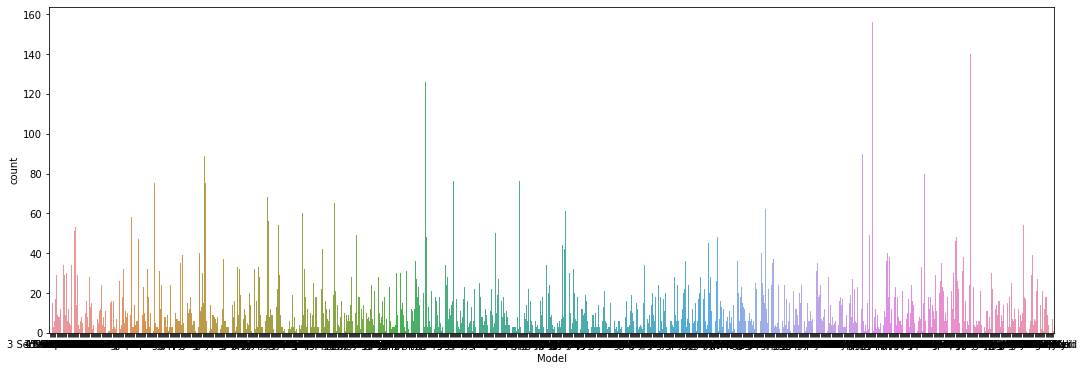

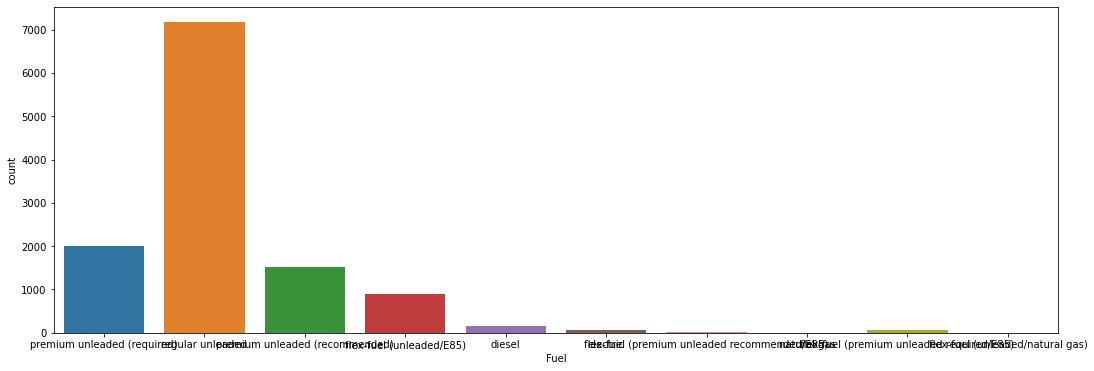

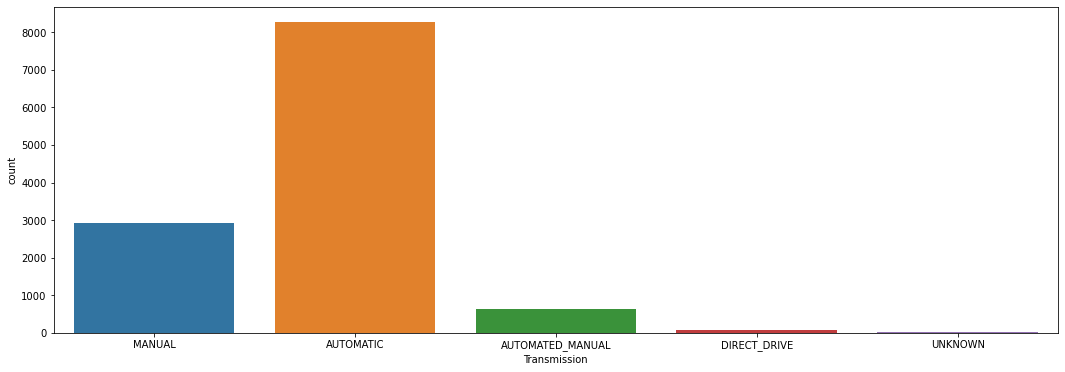

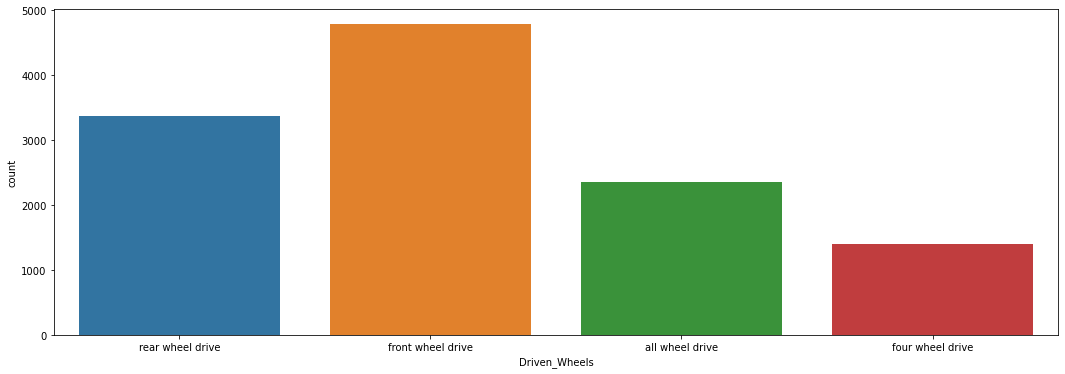

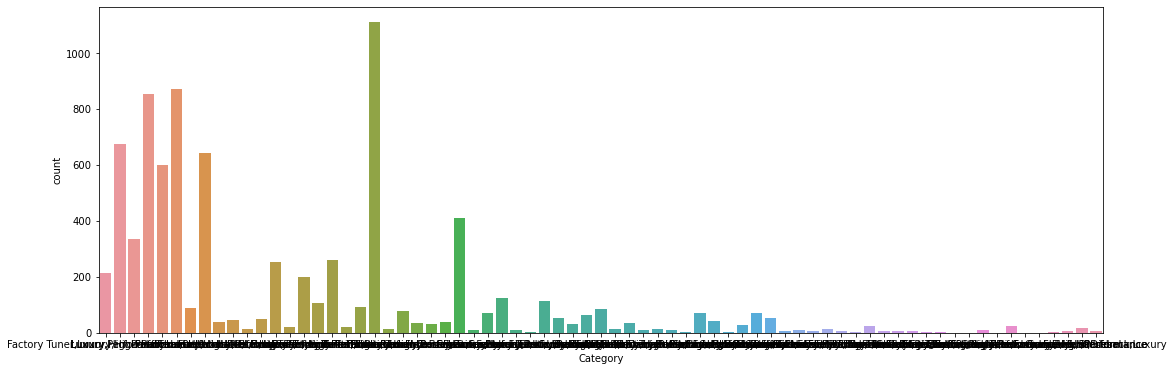

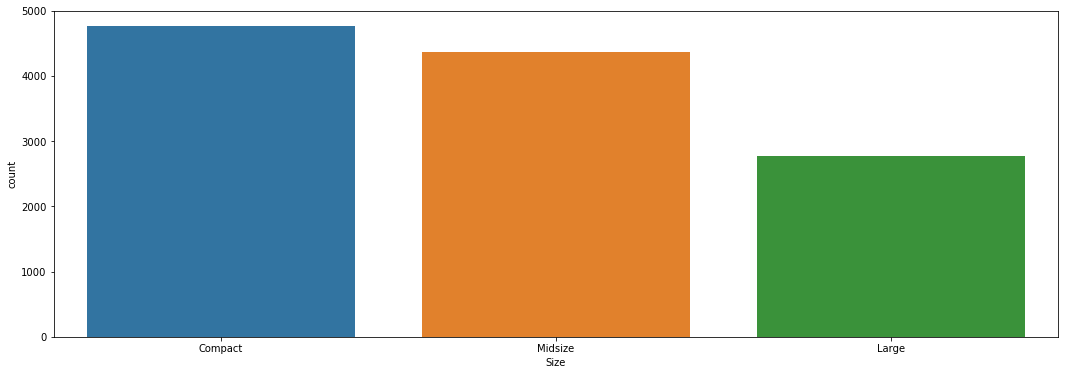

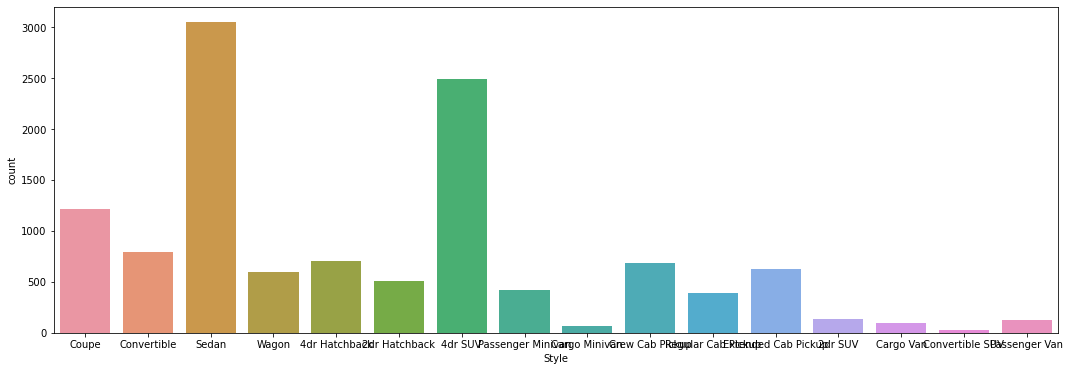

In [54]:
for col in data.select_dtypes('object'):
    plt.figure(figsize=(18,6))
    sb.countplot(x=data[col], data=data)


In [ ]:
data.select_dtypes()

In [65]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(normalize=True))
    print('\n')

Chevrolet        0.094259
Ford             0.073947
Volkswagen       0.067903
Toyota           0.062615
Dodge            0.052543
Nissan           0.046836
GMC              0.043226
Honda            0.037687
Mazda            0.035504
Cadillac         0.033322
Mercedes-Benz    0.029629
Suzuki           0.029461
BMW              0.028034
Infiniti         0.027699
Audi             0.027531
Hyundai          0.025432
Volvo            0.023586
Subaru           0.021487
Acura            0.021152
Kia              0.019389
Mitsubishi       0.017878
Lexus            0.016955
Buick            0.016451
Chrysler         0.015696
Pontiac          0.015612
Lincoln          0.013765
Oldsmobile       0.012590
Land Rover       0.012003
Porsche          0.011415
Saab             0.009317
Aston Martin     0.007806
Plymouth         0.006883
Bentley          0.006211
Ferrari          0.005792
FIAT             0.005204
Scion            0.005036
Maserati         0.004868
Lamborghini      0.004365
Rolls-Royce 

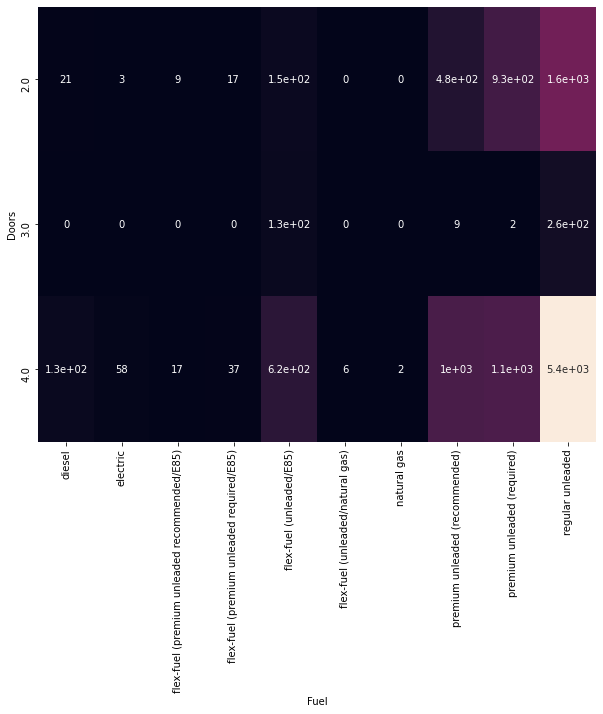

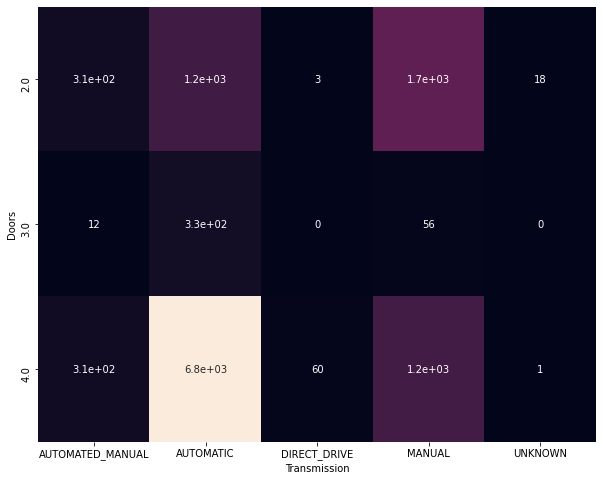

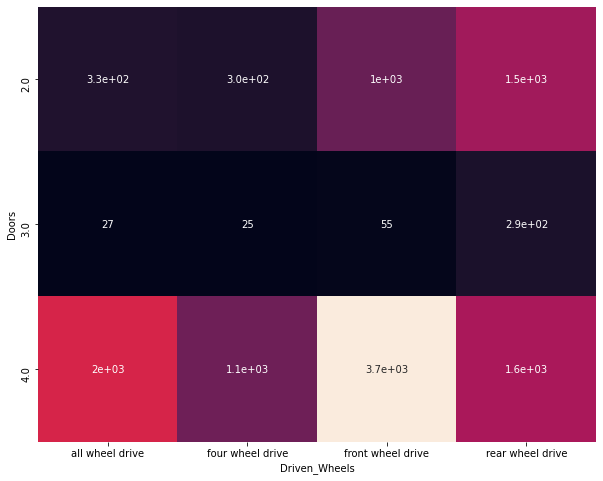

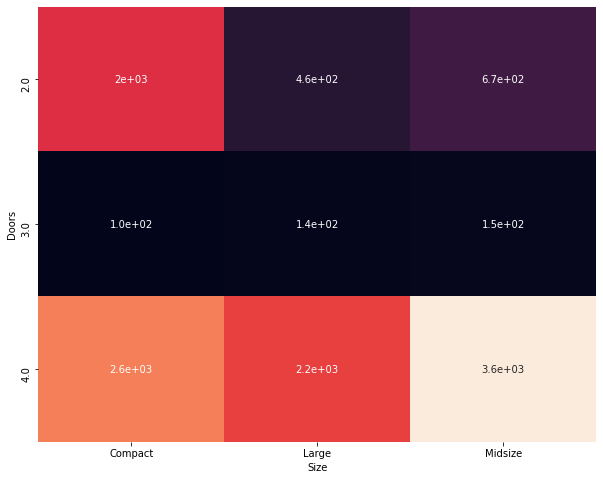

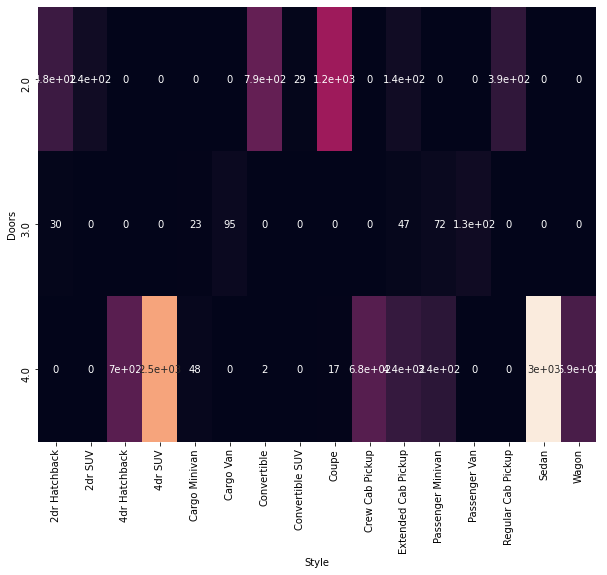

In [88]:
for col in data.drop(['Category', 'Model', 'Make'], axis=1).select_dtypes('object'):
    plt.figure(figsize=(10,8))
    sb.heatmap(pd.crosstab(data['Doors'], data[col]), cbar=False, annot=True)

In [87]:
data.Doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Doors, dtype: int64

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSRP', ylabel='count'>

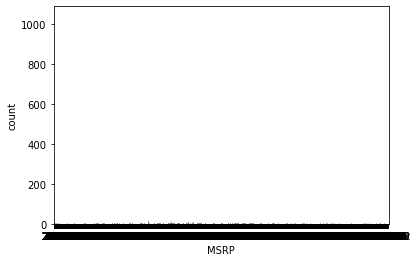

In [99]:
sb.countplot(data.MSRP)

In [97]:
pd.set_option('display.max_rows', 7000)

len(data.Make.value_counts())

48